C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Pred

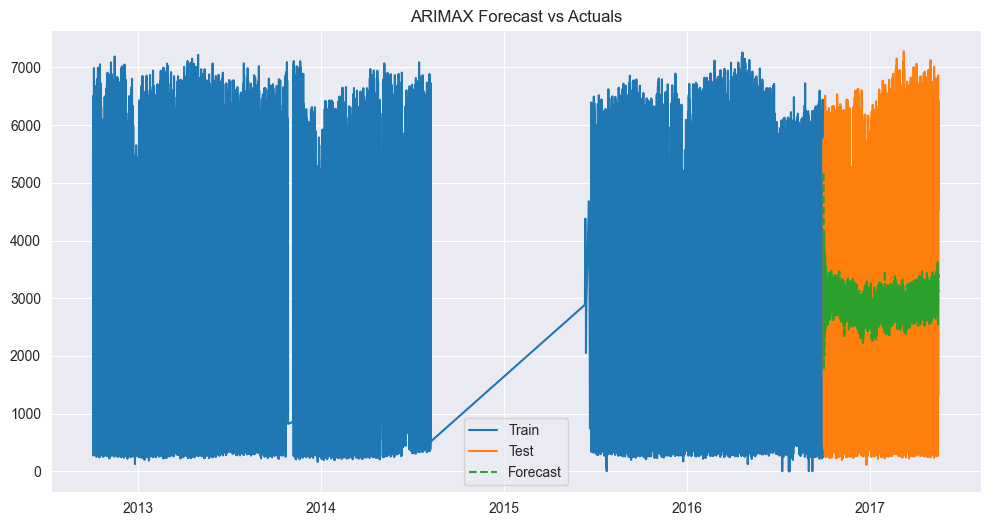

In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df_raw = pd.read_csv('Train.csv')

# Convert to datetime format and extract hour
df_raw['date_time'] = pd.to_datetime(df_raw['date_time'])
df_raw['hour'] = df_raw['date_time'].dt.hour

# Set 'date_time' as the index
df_raw.set_index('date_time', inplace=True)

# One-hot encode categorical columns
df_is_holiday = pd.get_dummies(df_raw['is_holiday'])
df_weather_type = pd.get_dummies(df_raw['weather_type'])
df_weather_description = pd.get_dummies(df_raw['weather_description'])

# Concatenate one-hot encoded columns and original dataframe
df_processed = pd.concat([df_raw, df_is_holiday, df_weather_type, df_weather_description], axis=1)

# Drop original non-numeric columns
df_processed.drop(columns=['is_holiday', 'weather_type', 'weather_description'], inplace=True)

# Split data
split_ratio = 0.8
split_point = int(len(df_raw) * split_ratio)
train = df_processed.iloc[:split_point]
test = df_processed.iloc[split_point:]

# Separate endogenous and exogenous variables
endog_train = train['traffic_volume']
exog_train = train.drop('traffic_volume', axis=1)

endog_test = test['traffic_volume']
exog_test = test.drop('traffic_volume', axis=1)

# ARIMAX Model (order and seasonal_order parameters might need tuning)
model = SARIMAX(endog_train, exog=exog_train, order=(2,1,2), seasonal_order=(2,0,2,12))
results = model.fit(disp=True)

# Forecasting
forecast = results.predict(start=len(train), end=len(train)+len(test)-1, exog=exog_test)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(train.index, endog_train, label='Train')
plt.plot(test.index, endog_test, label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('ARIMAX Forecast vs Actuals')
plt.show()

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Convert Timestamps to numeric values (e.g., floats)
endog_test_numeric = endog_test.values.astype(float)
forecast_numeric = forecast.values.astype(float)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(endog_test_numeric, forecast_numeric))

# Compute MAE
mae = mean_absolute_error(endog_test_numeric, forecast_numeric)

# Compute MAPE
mape = np.mean(np.abs((endog_test_numeric - forecast_numeric) / endog_test_numeric)) * 100

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Root Mean Squared Error (RMSE): 1902.9038199002887
Mean Absolute Error (MAE): 1676.8433477104875
Mean Absolute Percentage Error (MAPE): 143.23627154641855%


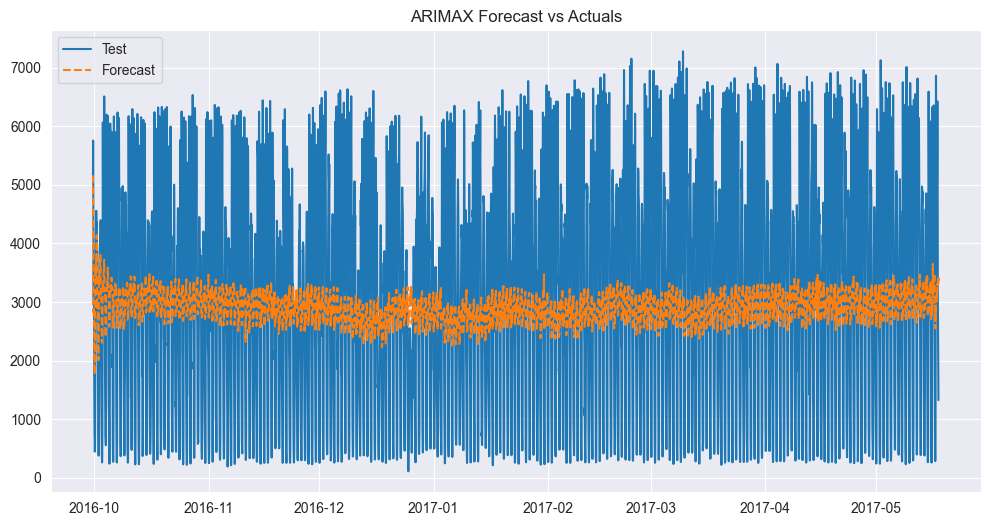

In [6]:
# Visualization
plt.figure(figsize=(12, 6))
#plt.plot(train.index, endog_train, label='Train')
plt.plot(test.index, endog_test, label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('ARIMAX Forecast vs Actuals')
plt.show()